## Image Contours

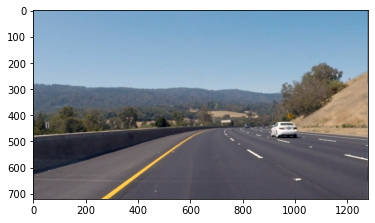

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/curved_lane.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

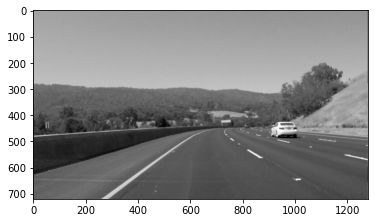

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')


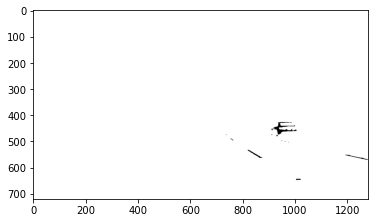

In [3]:
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')


cv2.CHAIN_APPROX_NONE - stores all the boundary points even if its a straight line
cv2.CHAIN_APPROX_SIMPLE - stores only the endpoints if its a straight line

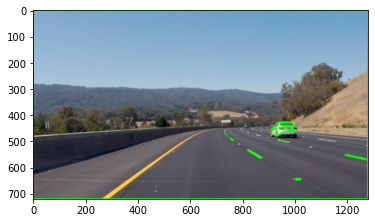

In [4]:
# Find contours from thresholded, binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1,(0,255,0),3)
plt.imshow(contours_image)

### Aspect Ratio
It is the ratio of width to height of bounding rectangle of object.
$$Aspect Ratio = \frac{Width}{Height}$$

In [5]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    print(aspect_ratio)

1.7777777777777777
2.857142857142857
4.0
1.8125
2.0
1.0
2.0
1.3333333333333333
1.6666666666666667
1.3
1.0
1.25
0.8333333333333334
1.0
0.8
1.0
1.82
2.0


### Extent
Extent is the ratio of contour area to bounding rectangle area.
$$Extent = \frac{Object Area}{Bounding Rectangle Area}$$

In [6]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    rect_area = w*h
    extent = float(area)/rect_area
    print(extent)

0.9978309461805556
0.65
0.16916322314049587
0.1710668103448276
0.4444444444444444
0.2222222222222222
0.4444444444444444
0.3333333333333333
0.4
0.28076923076923077
0.5714285714285714
0.35
0.36666666666666664
0.2222222222222222
0.425
0.2222222222222222
0.31934065934065936
0.0



### Solidity
Solidity is the ratio of contour area to its convex hull area.

$$Solidity = \frac{Contour Area}{ Convex Hull area}$$

In [7]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    print(solidity)

1.0
0.9238578680203046
0.6858638743455497
0.7781862745098039
1.0
1.0
1.0
1.0
1.0
0.8795180722891566
1.0
1.0
0.9565217391304348
1.0
0.9066666666666666
1.0
0.45019364833462433


ZeroDivisionError: float division by zero

### Equivalent Diameter
Equivalent Diameter is the diameter of the circle whose area is same as the contour area.
$$Equivalent Diameter = \sqrt{\frac{4*Contour Area}{\pi}}$$

In [ ]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    equi_diameter = np.sqrt(4*area/np.pi)
    print(equi_diameter)

## Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in [OpenCV documentation, here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html).

In the next cell, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

### Orientation

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the `angle` from that shape.
 
```python
# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

### TODO: Find the orientation of each contour

In [ ]:
## TODO: Complete this function so that 
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    
    for cnt in contours:
        # Fit an ellipse to a contour and extract the angle from that ellipse
        (x,y), (MA,ma), angle = cv2.fitEllipse(cnt)
        angles.append(angle)
        
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

### Bounding Rectangle

In the next cell, you'll be asked to find the bounding rectangle around the *left* hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand!

```python
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
```

And to crop the image, select the correct width and height of the image to include.

```python
# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w] 
```

### TODO: Crop the image around a contour

In [ ]:
## TODO: Complete this function so that
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    ## TODO: Detect the bounding rectangle of the left hand contour
    
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    # Crop the image using the dimensions of the bounding rectangle
    cropped_image = cropped_image[y: y + h, x: x + w]
    
    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour = contours[1]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)

In [ ]:
def objects_in_img(img, contours):
    cropped_image = np.copy(img)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(selected_contour)
        cropped_image = cropped_image[y:y+h,x:x+w]
        plt.imshow(cropped_image)
#     if(selected_contour is not None):
#         plt.imshow(cropped_image)
    return 1

In [ ]:
for cnt in contours:
    cropped_image = objects_in_img(image, cnt)
    plt.imshow(cropped_image)

In [ ]:
objects_in_img(image, contours)